### KNN Regression으로 50cm 생선의 무게 예측

In [30]:
import numpy as np

In [31]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### Train Set과 Test Set 분리

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_length,
    fish_weight,
    random_state=42
)

In [34]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

### kNN Regression Model

In [35]:
from sklearn.neighbors import KNeighborsRegressor


In [36]:
# 이웃의 갯수를 3으로 선택
knr= KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

### 길이가 50cm인 생선의 무게 예측

In [37]:
knr.predict([[50]])

array([1033.33333333])

> 1033g

### 기존 데이터로 무게 확인

In [38]:
for i, v in list(enumerate(train_target)):
    if v == train_target.max():
        print(train_input[i], v) # 생선의 길이, 생선의 무게


[43.] 1100.0
[42.] 1100.0


In [39]:
train_target

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

### 산점도로 이웃을 구해서 확인해보자

In [40]:
import matplotlib.pyplot as plt

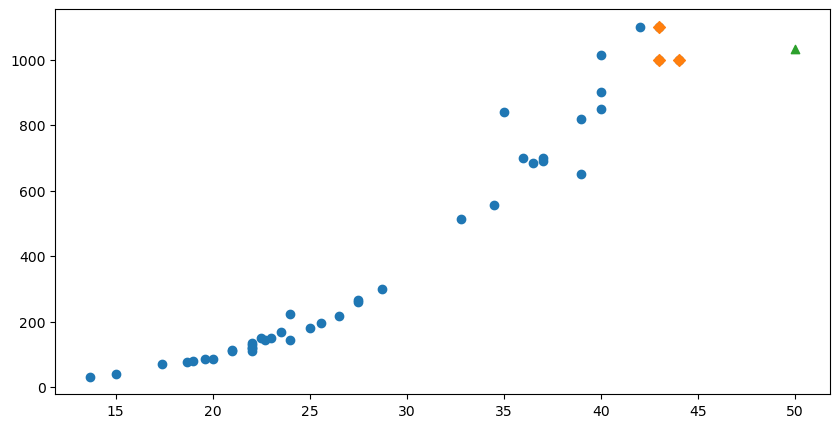

In [41]:
# 50cm인 생선의 이웃
distance, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 훈련세트 중에서 이웃만 그리자
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm인 생선의 위치
plt.scatter(50, 1033, marker='^')
plt.show()

In [42]:
# 이웃들의 평균값 계산
np.mean(train_target[indexes])

1033.3333333333333

### 길이가 100cm인 생선의 무게 예측 및 산포도로 위치 구하기

In [43]:
knr.predict([[100]])

array([1033.33333333])

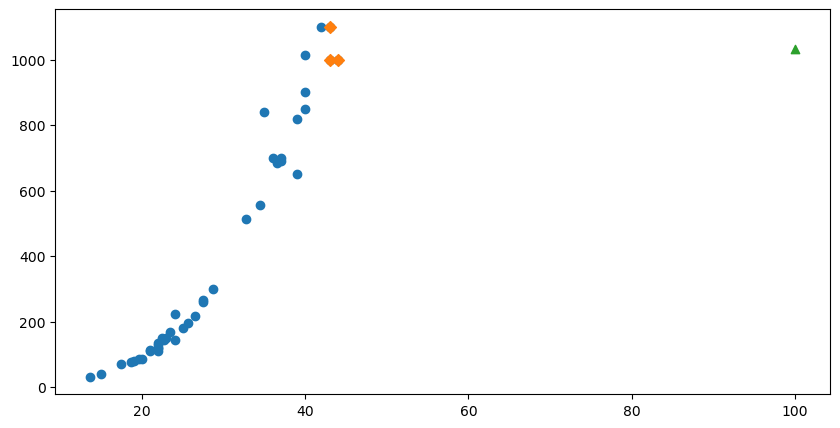

In [44]:
# 100cm인 생선의 이웃
distance, indexes = knr.kneighbors([[100]])

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 훈련세트 중에서 이웃만 그리자
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm인 생선의 위치
plt.scatter(100, 1033, marker='^')
plt.show()

> KNN Regression은 내 주변 이웃의 값들의 평균을 구하는 것이므로 학습한 데이터의 범위를 벗어나게 되면 사용할 수 없다.

---
### 선형 회귀(Linear regression)
: 직선이나 곡선의 함수식(방정식: Y=aX + b)을 이용하여 구하는 방식으로  
로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [47]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


> 과대적합(5% 이상 차이나면 못씀)

In [48]:
# 50cm인 생선의 무게
lr.predict([[50]])

array([1241.83860323])

In [49]:
# y = aX + b에서 기울기(가중치: Weight)와 절편값(Bias) 출력
print(lr.coef_, lr.intercept_)


[39.01714496] -709.0186449535477


In [50]:
# 기울기와 절편으로 계산
39.01714496 * 10 - 709.0186449535477

-318.84719535354765

### 산점도 그려보기

In [52]:
import matplotlib.pyplot as plt

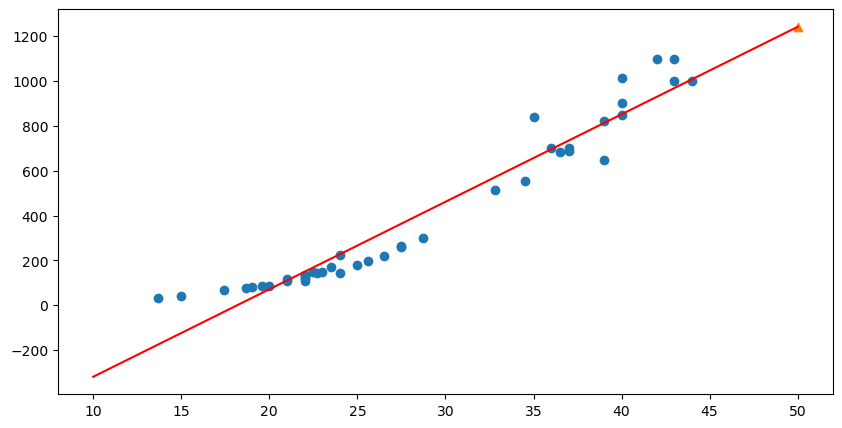

In [60]:
# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(
    train_input,
    train_target
)

# 생선의 길이가 10 ~ 50까지의 1차원 방정식 그래프
plt.plot(
    [10, 50],
    [10 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_],
    c='red'
)

# 50cm 생성
plt.scatter(
    50,
    50 * lr.coef_ + lr.intercept_,
    marker='^'
)

plt.show()

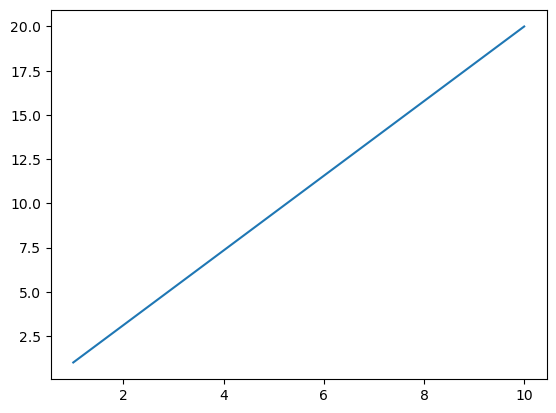

In [57]:
# 참고
plt.plot(
    [1, 10],
    [1, 20]
)
plt.show()

### 특성공학(Feature Engineering)
#### 다항회귀 
Y = aX^2 + bX + C
- 항이 여러개 있고 Feature가 하나인 것을 의미
- Feature가 여러개인 회귀는 다중 회귀라고 한다.

In [ ]:
# Feature를 제곱한 컬럼을 생성하여 기존의 컬럼에 붙인다.


In [62]:
# Ex) np.column_stck과 np.row_stack
a = np.array([1,2,3,4])
print(a)
print(np.column_stack((a** 2, a)))
np.row_stack((a**2, a))

[1 2 3 4]
[[ 1  1]
 [ 4  2]
 [ 9  3]
 [16  4]]


array([[ 1,  4,  9, 16],
       [ 1,  2,  3,  4]])

In [64]:
# Feature를 제곱한 컬럼을 생성하여 기존의 컬럼에 붙인다.
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [65]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [66]:
# Model 생성
lr = LinearRegression()

In [67]:
# 선형회귀 모델 훈련
lr.fit(train_poly, train_target)

LinearRegression()

In [68]:
# 50cm인 생선의 무게 예측
lr.predict([[50**2, 50]])

array([1573.98423528])

In [69]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278304


In [70]:
1.01433211 * 50**2 + -21.55792498 * 50 + 116.05021078278304

1573.984236782783

### 산점도 그리기

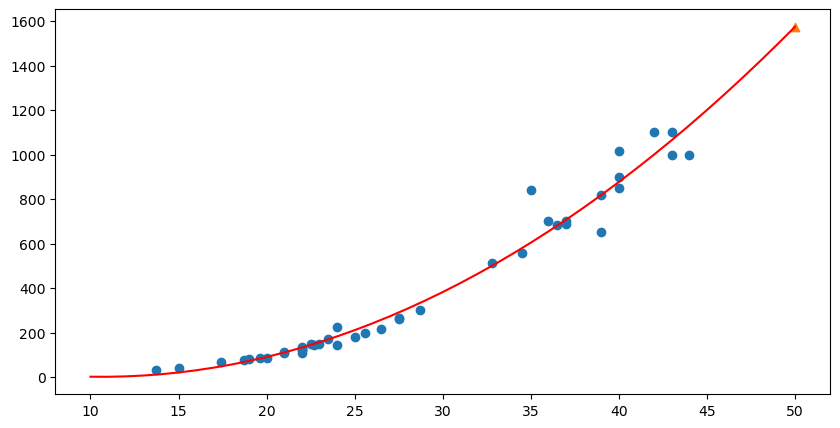

In [80]:
# 구간별 직선을 그리기 위해 10에서 50까지 정수배열
point = np.arange(10, 51)

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 10에서 50까지의 2차 방정식 그래프
plt.plot(
    point,
    lr.coef_[0] * point**2 + lr.coef_[1] * point + lr.intercept_,
    color='red'
)

# 50cm 생선 데이터
plt.scatter(
    50, 
    lr.coef_[0] * 50**2 + lr.coef_[1] * 50 + lr.intercept_,
    marker='^'
)

plt.show()

In [81]:
print(lr.coef_)
print(lr.coef_[0])

[  1.01433211 -21.55792498]
1.01433210937673


In [82]:
# 과대적합과 과소적합 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


> 약간의 과소적합이 발생하지만 단순회귀보다는 다항회귀가 진전이 있었다.